In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline


READING THE DATABASE

In [2]:
## reading the raw database
df_raw = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df_raw

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


CREATING TWO DIFFERENT DATABASES FOR BEJIA AND SIDI_BEL REGION

In [3]:
## DATA BASE FOR BEJIA 
df_raw_bejia = df_raw[0:122]
df_raw_bejia

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [4]:
## DATABASE FOR SIDI_BEL
df_raw_sidi_bel = df_raw[125:]
df_raw_sidi_bel 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


CREATING REGION COLUMN FOR BOTH THE DATABSES 

In [5]:
df_raw_bejia["Region"] = "bejia"
df_raw_bejia

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,bejia
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,bejia
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,bejia
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,bejia


In [6]:
df_raw_sidi_bel["Region"] = "sidi_bel"
df_raw_sidi_bel

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,sidi_bel
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,sidi_bel
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,sidi_bel
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,sidi_bel
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,sidi_bel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


CONCATENATING THE TWO DATABASES 

In [7]:
df_raw_concat = pd.concat([df_raw_bejia,df_raw_sidi_bel])
df_raw_concat

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [8]:
## CREATING A COPY OF CONCATENATED DATABASE
df = df_raw_concat.copy()
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


RENAMING THE COLUMNS OF THE WORKING DATABASE 

In [9]:
df.columns = ["day","month","year","Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI","Classes","Region"]

In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [11]:
## dropping year column as it is same 
df = df.drop(["year"],axis = 1)


In [12]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
243,27,9,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
244,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
245,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [13]:
## RESETING THE INDEX OF THE DATABSE 
df = df.reset_index()

In [14]:
df

,index,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,1,2,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,3,4,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,4,5,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,242,26,9,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
240,243,27,9,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
241,244,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
242,245,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [15]:
## SLICING OUT THE INDEX COLUMN FROM THE DATABSE 
df = df.iloc[0:,1:]
df


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejia
4,5,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi_bel
240,27,9,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi_bel
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [16]:
##checking shape of the data
df.shape

(244, 14)

In [17]:
## checking info or dtypes
df.info()
## WE SEE ALL THE COULUMN OR FEATURES ARE OF DTYPES OBJECT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   Temperature  244 non-null    object
 3   RH           244 non-null    object
 4   Ws           244 non-null    object
 5   Rain         244 non-null    object
 6   FFMC         244 non-null    object
 7   DMC          244 non-null    object
 8   DC           244 non-null    object
 9   ISI          244 non-null    object
 10  BUI          244 non-null    object
 11  FWI          244 non-null    object
 12  Classes      243 non-null    object
 13  Region       244 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


CHANGING DATATYPES OF SOME OF THE FEATURES FOR ANALYSIS 

In [18]:
## CHANGING INTO INT DATATYPE
df[["day","month","Temperature","RH","Ws"]] = df[["day","month","Temperature","RH","Ws"]].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   Temperature  244 non-null    int32 
 3   RH           244 non-null    int32 
 4   Ws           244 non-null    int32 
 5   Rain         244 non-null    object
 6   FFMC         244 non-null    object
 7   DMC          244 non-null    object
 8   DC           244 non-null    object
 9   ISI          244 non-null    object
 10  BUI          244 non-null    object
 11  FWI          244 non-null    object
 12  Classes      243 non-null    object
 13  Region       244 non-null    object
dtypes: int32(5), object(9)
memory usage: 22.0+ KB


In [25]:
## CHANGING INTO FLOAT DATATYPE
df["FFMC"] = df["FFMC"].str.replace(".","")
df["FFMC"] = df["FFMC"].astype(float)/10


AttributeError: Can only use .str accessor with string values!

In [ ]:
df["DMC"] = df["DMC"].str.replace(".","")
df["DMC"] = df["DMC"].astype(float)/10
df["DMC"]


In [36]:
df["Rain"] = df["Rain"].str.replace(".","")
df["Rain"] = df["Rain"].astype(float)/10
df["Rain"]


0       0.0
1       1.3
2      13.1
3       2.5
4       0.0
       ... 
239     0.0
240     4.4
241     0.5
242     0.1
243     0.2
Name: Rain, Length: 244, dtype: float64

In [30]:
df["DC"] = df["DC"].str.replace(".","")
df["DC"] = df["DC"].str.replace(" ","")
df["DC"] = df["DC"].astype(float)/10
df["DC"]

0       7.6
1       7.6
2       7.1
3       6.9
4      14.2
       ... 
239    44.5
240     0.8
241     7.9
242    15.2
243    16.5
Name: DC, Length: 244, dtype: float64

In [31]:
df["ISI"] = df["ISI"].str.replace(".","")
df["ISI"] = df["ISI"].astype(float)/10
df["ISI"]

0      1.3
1      0.1
2      0.3
3      0.0
4      1.2
      ... 
239    4.5
240    0.1
241    0.4
242    1.7
243    1.2
Name: ISI, Length: 244, dtype: float64

In [32]:
df["BUI"] = df["BUI"].str.replace(".","")
df["BUI"] = df["BUI"].astype(float)/10
df["BUI"]

0       3.4
1       3.9
2       2.7
3       1.7
4       3.9
       ... 
239    16.9
240     6.2
241     3.4
242     5.1
243     4.8
Name: BUI, Length: 244, dtype: float64

In [33]:
df["FWI"] = df["FWI"].str.replace(".","")
df["FWI"] = df["FWI"].str.replace("fire",str(np.nan))
df["FWI"] = df["FWI"].astype(float)/10
df["FWI"]

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [34]:
## STRIPPING EXTRA SPACES FROM CLASSES
df["Classes"] = df["Classes"].str.strip()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    int32  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       244 non-null    object 
dtypes: float64(7), int32(5), object(2)
memory usage: 22.0+ KB


CHECKING FOR THE NULL VALUES 

In [38]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

FILLING NULL VALUES 

In [42]:
m = df["FWI"].median()
df["FWI"] = df["FWI"].fillna(m)

In [45]:
n = df["Classes"].mode()
df["Classes"] = df["Classes"].fillna("fire")

In [46]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

DIFFERENTIATION OF CATEGORICAL AND NUMERICAL FEATURES 

In [47]:
## categorical features 
cat_cols = [features for features in df.columns if df[features].dtype == "object"]
cat_cols

['Classes', 'Region']

In [48]:
## numerical features 
num_cols = [features for features in df.columns if df[features].dtype != "object"]
num_cols

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

CREATING TWO DATABASES NUMERICAL AND CATEGORICAL DATABSES 

In [50]:
## creating num database 
df_num = df[num_cols]
df_num

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,0.1,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,0.3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,1.6,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,6.5,0.8,0.1,6.2,0.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [51]:
## creating num database 
df_cat = df[cat_cols]
df_cat

,Classes,Region
0,not fire,bejia
1,not fire,bejia
2,not fire,bejia
3,not fire,bejia
4,not fire,bejia
...,...,...
239,fire,sidi_bel
240,not fire,sidi_bel
241,not fire,sidi_bel
242,not fire,sidi_bel


VALUE COUNTS OF CATEGORICAL DATA 

In [52]:
df_cat.value_counts()

Classes   Region  
fire      sidi_bel    79
not fire  bejia       63
fire      bejia       59
not fire  sidi_bel    43
dtype: int64

In [68]:
x = df_cat.value_counts(normalize=True)*100
df_grp = x.to_frame()
df_grp = df_grp.reset_index()
df_grp

,Classes,Region,0
0,fire,sidi_bel,32.377049
1,not fire,bejia,25.819672
2,fire,bejia,24.180328
3,not fire,sidi_bel,17.622951


GROUPBY ON CATEGORICAL FEATURES 

In [71]:
df_grp1 = df.groupby(["Region"])["Classes"].value_counts(normalize=True)*100
df_grp1

Region    Classes 
bejia     not fire    51.639344
          fire        48.360656
sidi_bel  fire        64.754098
          not fire    35.245902
Name: Classes, dtype: float64

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='percentage count'>

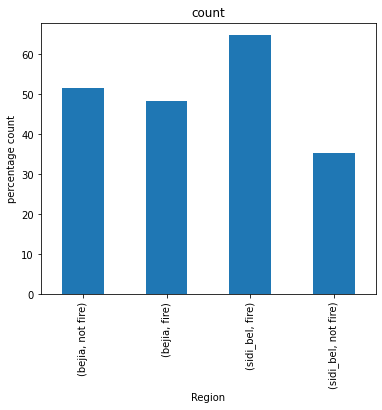

In [72]:
df_grp1.plot(kind='bar', title='count', ylabel='percentage count',
         xlabel='Region', figsize=(6, 5))

CONCLUSION : SIDI_BEL REGION IS THE MOST FIRE PRONE WITH MORE THAN 60% OF FIRE 

UNIVARIATE OF THE NUMERICAL FEATURES 

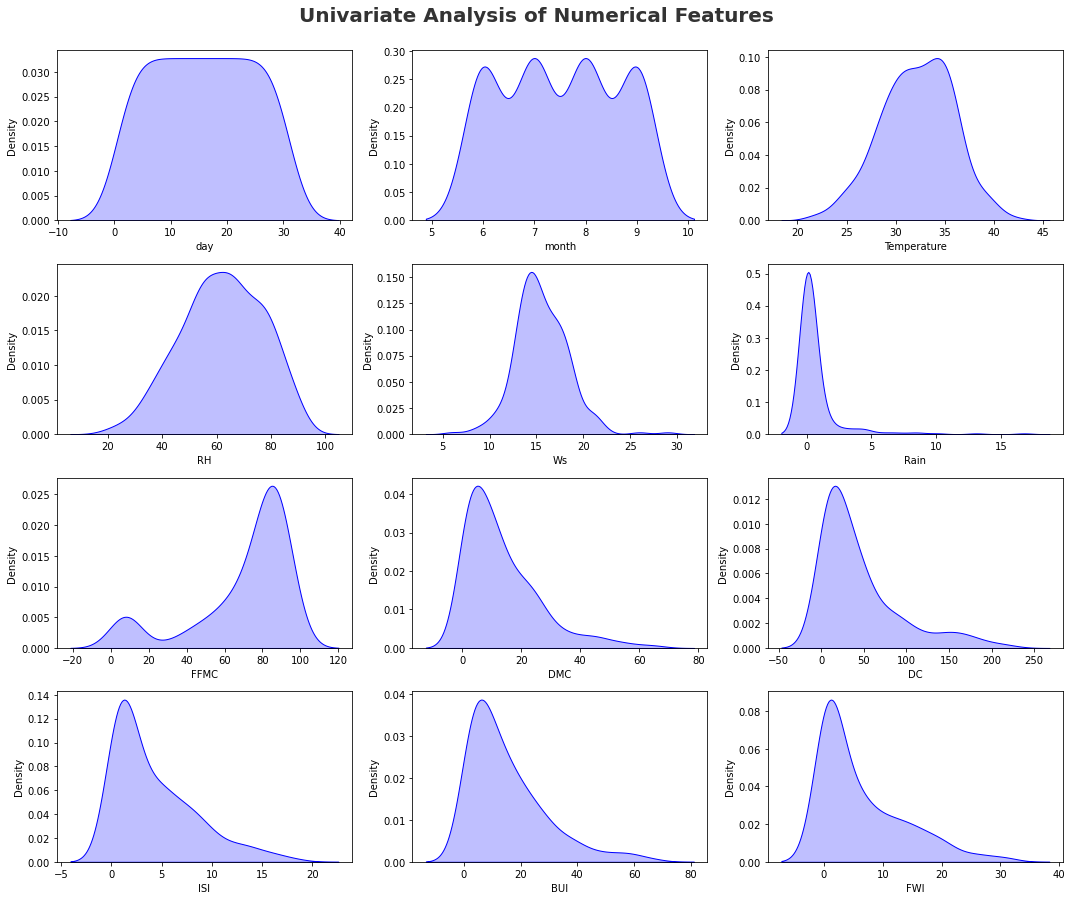

In [73]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]],shade=True, color='b')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

CONCLUSION : rain,DMC,DC,ISI,BUI,FWI are all are right skewed and postively skewed.
             FFMC is left skewed and negatively skewed 
             outliers in rain 

UNIVARIATE OF THE NUMERICAL FEATURES 

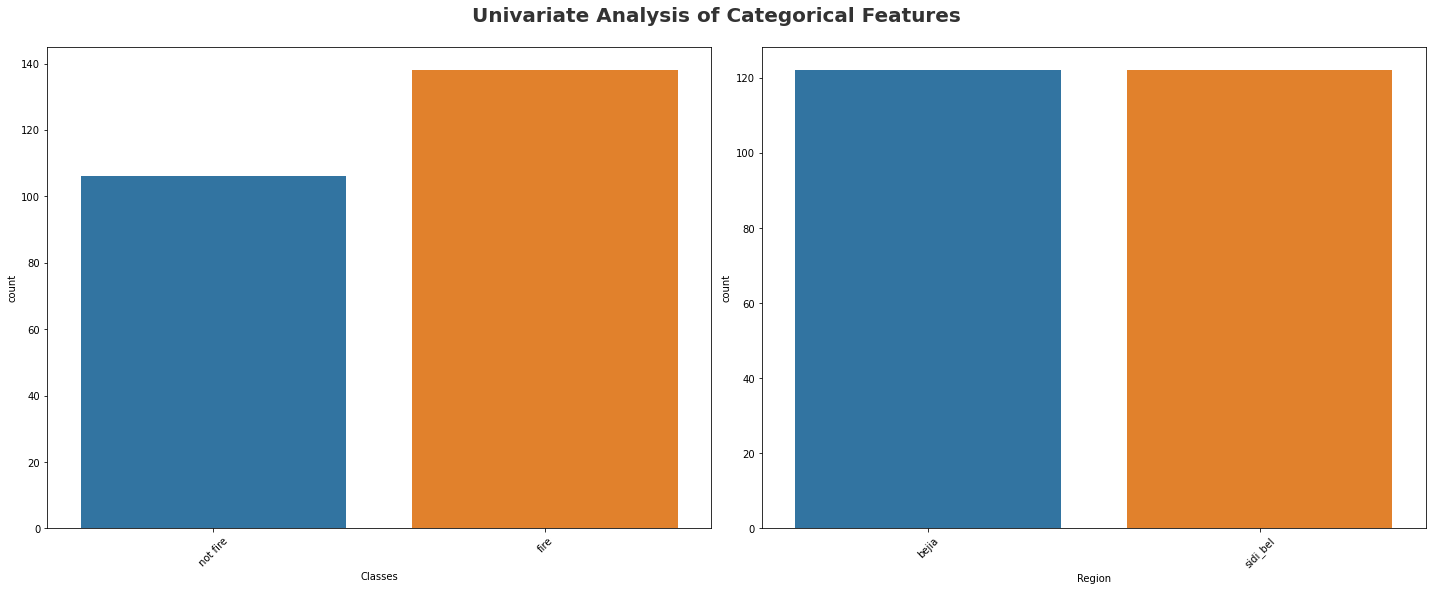

In [74]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat_cols
for i in range(0, len(cat_cols)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

CONCLUSION : cumulative casses of fire in both the refion is more than not fire 

Multivariate Analysis

In [76]:
## Check Multicollinearity in Numerical features
df_num.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.085241,0.135562,0.455927,0.476673,0.175780,0.476057,0.328545
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.054822,-0.000566,0.051890,0.106209,0.054824,0.053001,0.121192
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.323573,0.282648,0.429701,0.365421,0.530485,0.444215,0.499637
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.232234,-0.360563,-0.380023,-0.260142,-0.632388,-0.313706,-0.495828
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.184107,-0.032825,-0.021688,0.116442,0.026390,0.035928,0.029407
Rain,-8.524106e-02,5.482196e-02,-0.323573,0.232234,0.184107,1.000000,-0.234913,-0.256515,-0.256014,-0.300795,-0.264291,-0.277800
FFMC,1.355621e-01,-5.659360e-04,0.282648,-0.360563,-0.032825,-0.234913,1.000000,0.265804,0.224067,0.338403,0.321741,0.325593
DMC,4.559274e-01,5.189017e-02,0.429701,-0.380023,-0.021688,-0.256515,0.265804,1.000000,0.735327,0.546852,0.763175,0.772691
DC,4.766731e-01,1.062087e-01,0.365421,-0.260142,0.116442,-0.256014,0.224067,0.735327,1.000000,0.466394,0.780626,0.690928
ISI,1.757804e-01,5.482408e-02,0.530485,-0.632388,0.026390,-0.300795,0.338403,0.546852,0.466394,1.000000,0.523600,0.717791


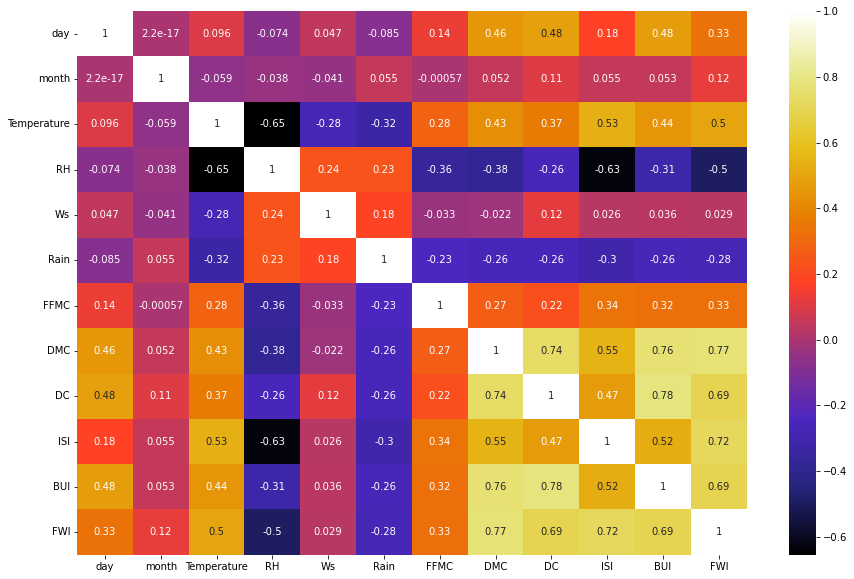

In [77]:
plt.figure(figsize = (15,10))
sns.heatmap(df_num.corr(), cmap="CMRmap", annot=True)
plt.show()

CONCLUSIONS:
    1) STRONG NEGATIVE CORR BET RELATIVE HUMIDITY AND TEMPERATURE
    2) STRONG NEGATIVE CORR BET ISI AND RH
    3) STRONG POSITIVE CORR BET DC AND DMC , DMC AND BUI, DMC AND FWI, BUI AND DC, FWI AND DC, BUI AND FWI 
    

Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e FWI

In [78]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['FWI'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Classes,Reject Null Hypothesis
1,Region,Fail to Reject Null Hypothesis


CONTINUOUS FEATURES 

In [80]:
continues_features=[feature for feature in num_cols if len(df[feature].unique())>=10]
continues_features

['day',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

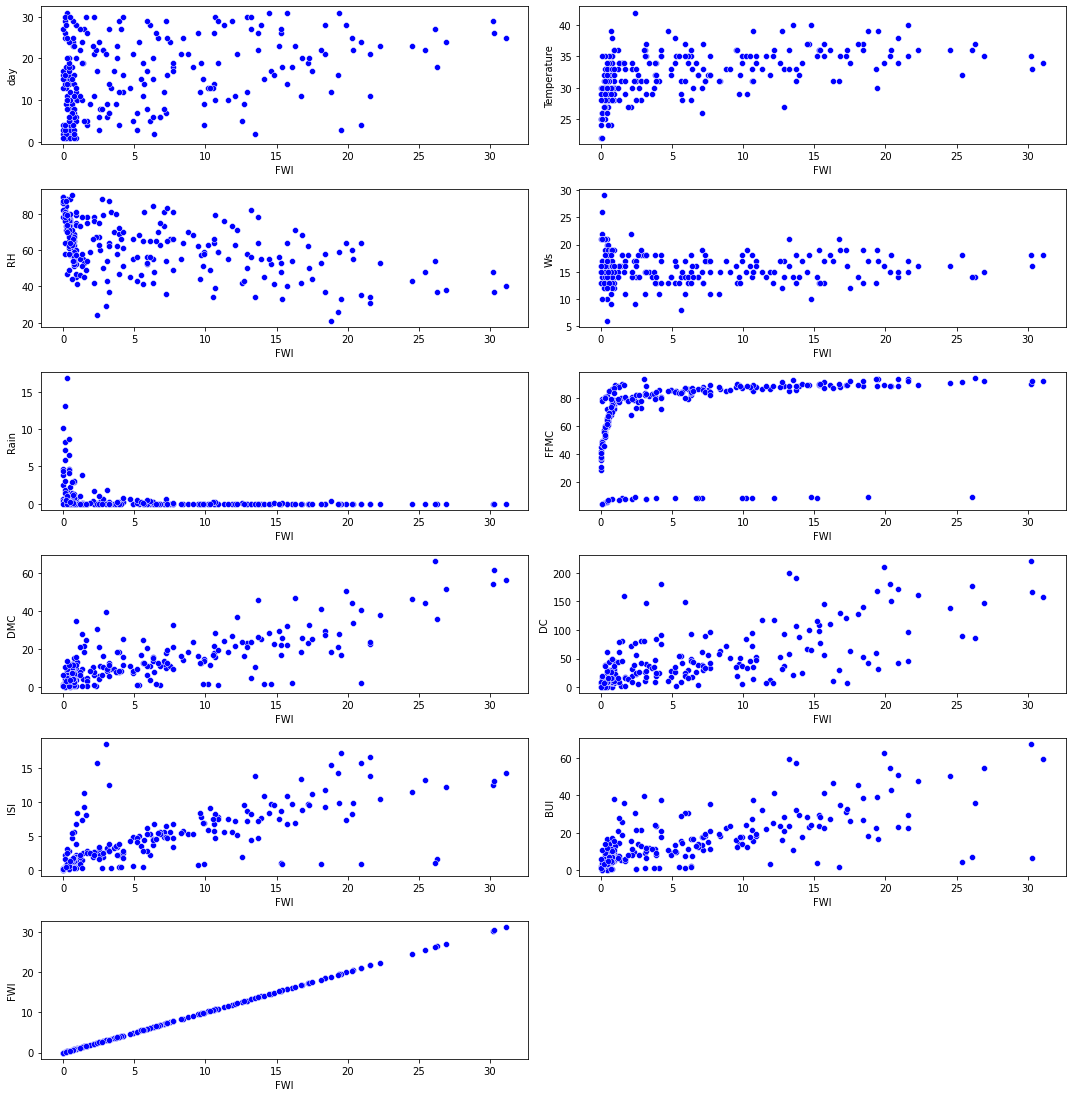

In [82]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='FWI', y=continues_features[i], color='b')
    
    plt.tight_layout()


CONCLUSIONS: 
    1) TEMP ABOVE 30 IS POSITIVELY IMPACTING THE FWI SO MORE IS THE CASSES OF FIRE 
    2) RH IS POSITIVELY IMPACTING THE FWI SO MORE IS THE CASSES OF FIRE 
    3) RAIN AND FWI IS NEGATIVELY RELATED SO LESS IS THE RAIN MORE IS THE CASSES OF FIRE INT HE REGION
    4) FFMC AND FWI IS POSITIVELY RELATED SO MORE THE FFMC MORE IS THE FIRE 
    5) DMC IS NEGATIVELY IMPACTING THE FWI LESS THE DMC MORE IS THE CASSES OF FIRE 
  

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>]], dtype=object)

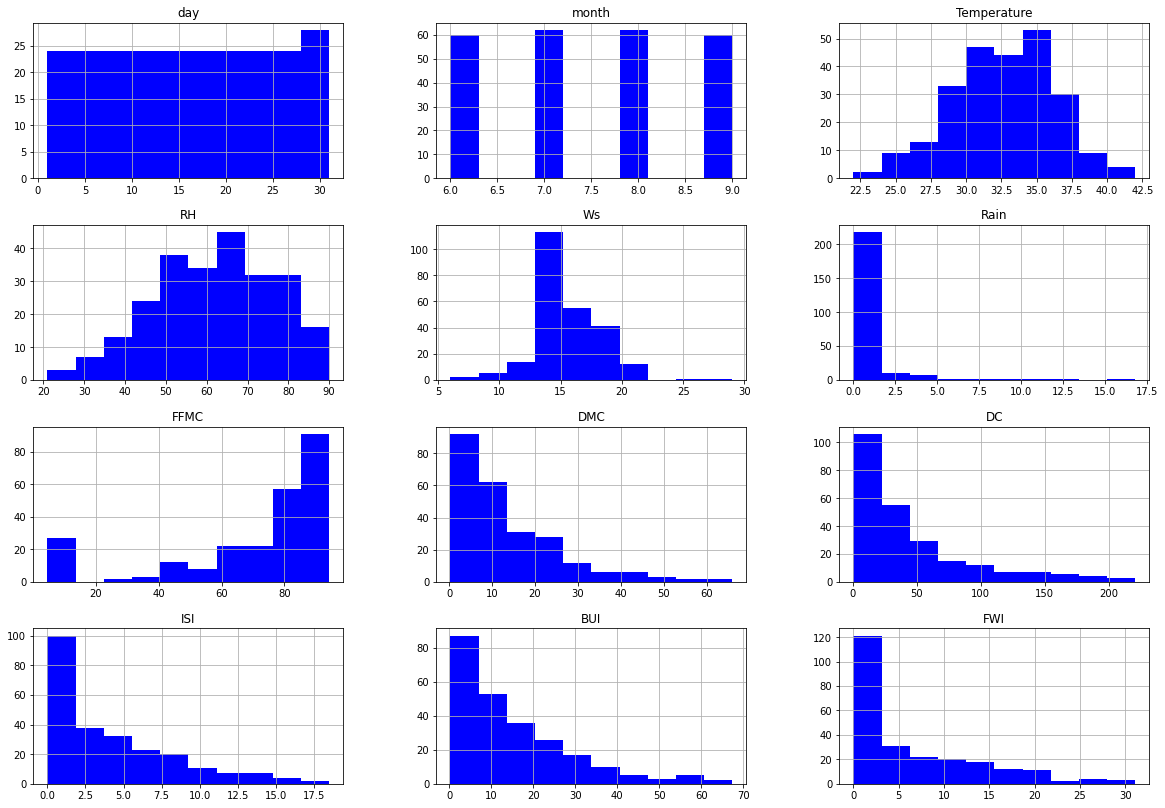

In [116]:
## histogram 
df.hist(figsize=(20,14),color="b")

<AxesSubplot:xlabel='Temperature', ylabel='day'>

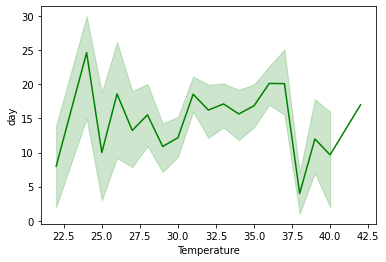

In [117]:
## lineplot 
sns.lineplot(x="Temperature",y="day",data=df,color="g")

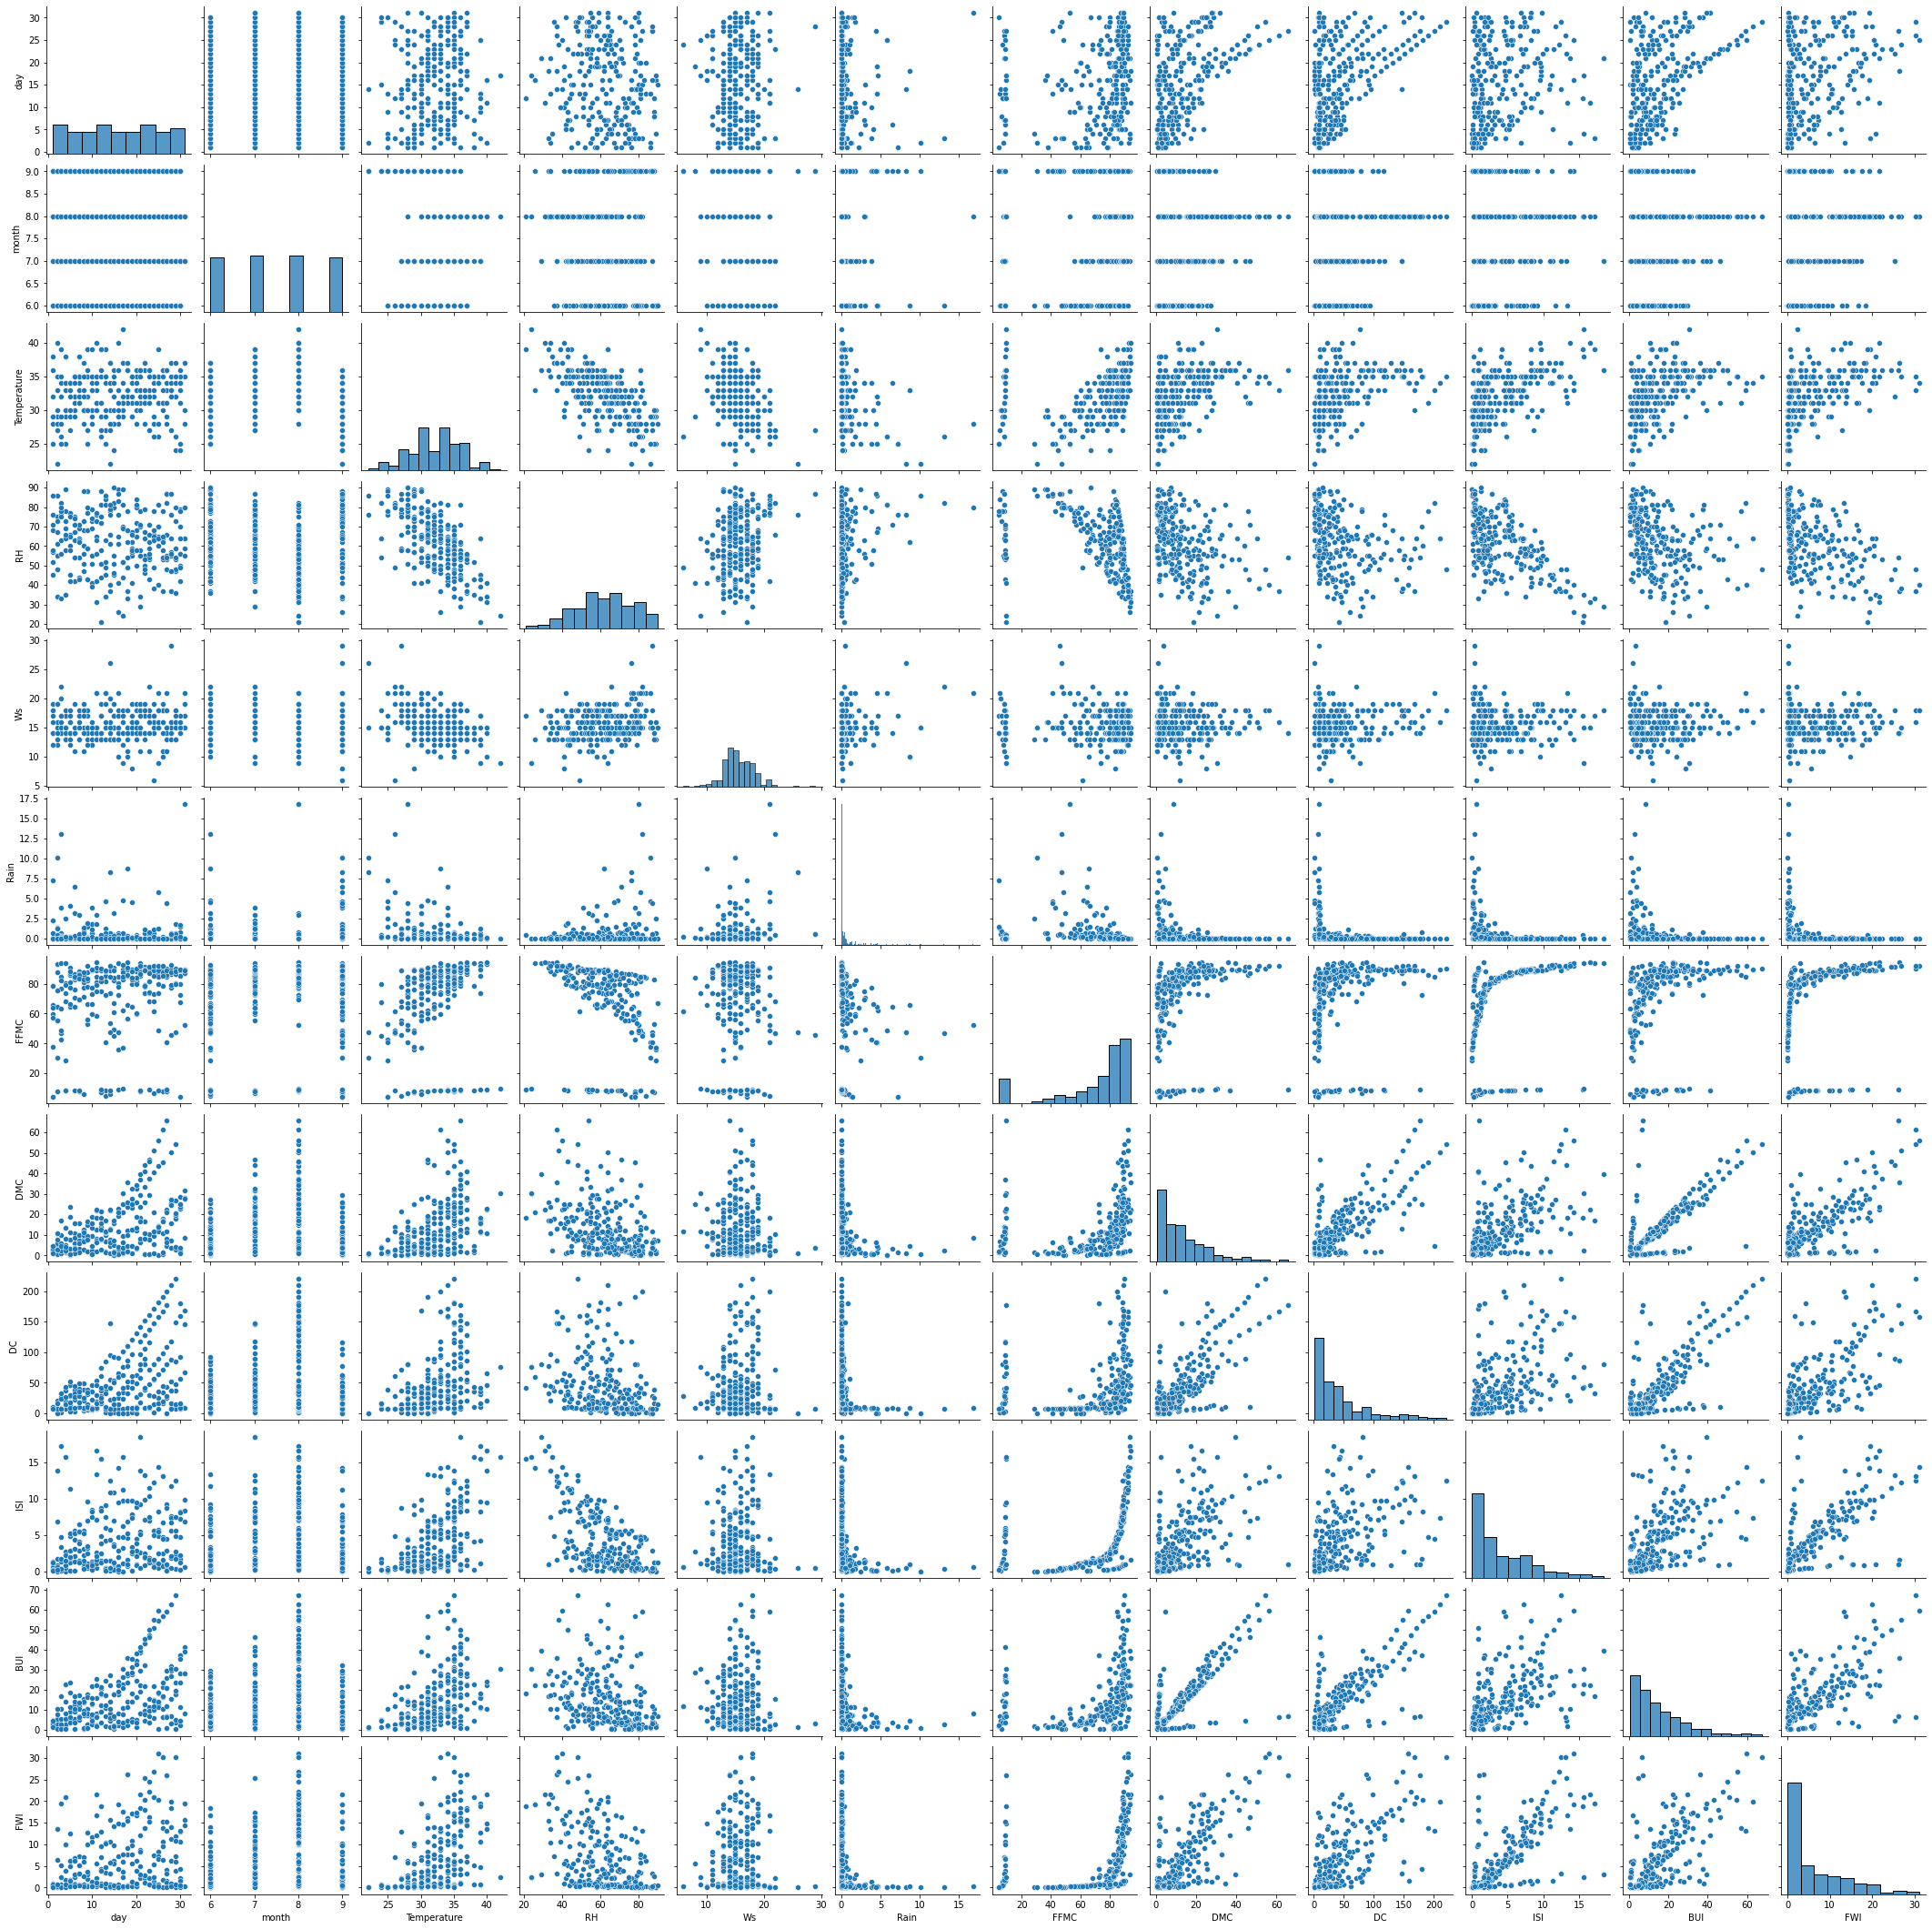

In [118]:
## pairplot
sns.pairplot(df)

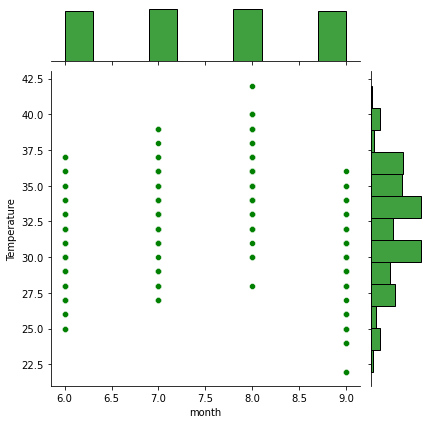

In [120]:
## joinplot 
sns.jointplot(x="month",y="Temperature",data=df,color="g")

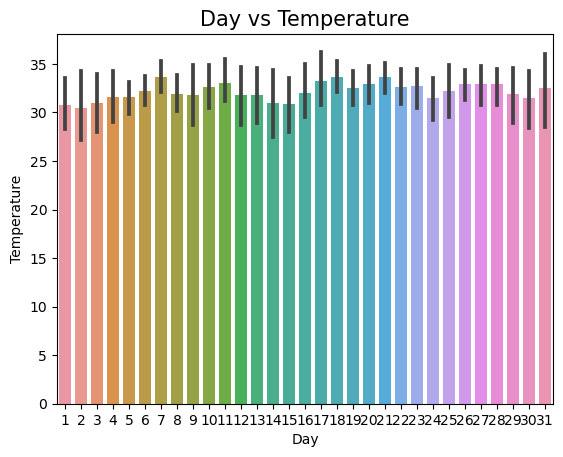

In [126]:
plt.style.use("default")
sns.barplot (x="day",y="Temperature",data=df)
plt.title("Day vs Temperature", fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature") 
plt.show()

Visualize the Target Feature

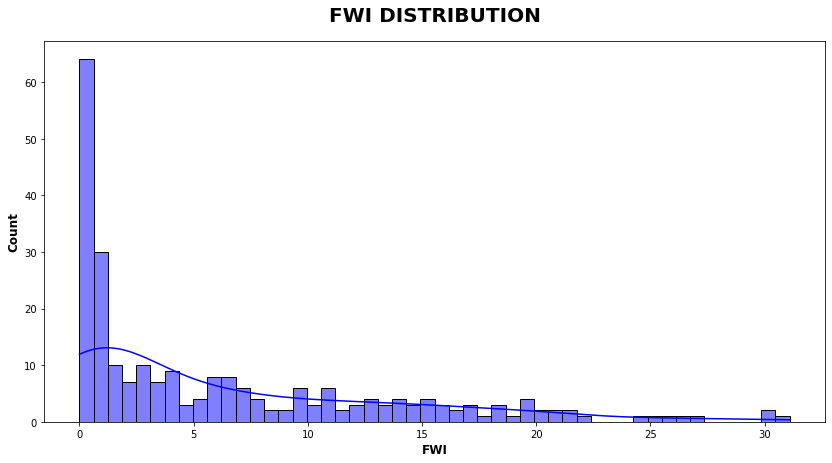

In [88]:
plt.subplots(figsize=(14,7))
sns.histplot(df.FWI, bins=50, kde=True, color = 'b')
plt.title("FWI DISTRIBUTION", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("FWI", weight="bold", fontsize=12)
#plt.xlim(0,3000000)
plt.show()


From the chart it is clear that the Target Variable Skewed

In [89]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,0.1,3.9,0.4,not fire,bejia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejia
4,5,6,27,77,16,0.0,64.8,0.3,14.2,1.2,3.9,0.5,not fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,1.6,44.5,4.5,16.9,6.5,fire,sidi_bel
240,27,9,28,87,15,4.4,41.1,6.5,0.8,0.1,6.2,0.0,not fire,sidi_bel
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi_bel
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi_bel


In [93]:
## RELATIONSHIP BETWEEN MONTH,REGION AND FWI 
df_rg_mn = df.groupby(["Region","month"])["FWI"].mean()
df_rg_mn

Region    month
bejia     6         3.396667
          7         4.706452
          8        10.977419
          9         1.850000
sidi_bel  6         3.310000
          7         6.629032
          8        13.690323
          9         5.543333
Name: FWI, dtype: float64

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='FWI MEAN COUNT'>

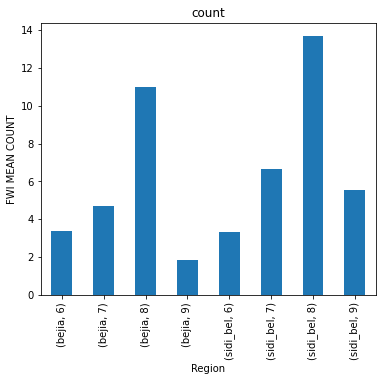

In [94]:
df_rg_mn.plot(kind='bar', title='count', ylabel='FWI MEAN COUNT',
         xlabel='Region', figsize=(6, 5))

In [ ]:
CONCLUSION : WE SEE THAT FOR BOTH THE REGION THE CASSES OF FIRE IS MORE IN AUGUST WHERE FWI MEAN IS MORE IN AUGUST IN RELATION TO ALL OTHER MONTHS 

In [102]:
## finding out in which day of which month and in which region the fwi was the max 
x=df["FWI"].max()
x
df[df["FWI"] == 31.1]
## we see 25th of august in sidi_bel region has the most fwi 

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
207,25,8,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,fire,sidi_bel


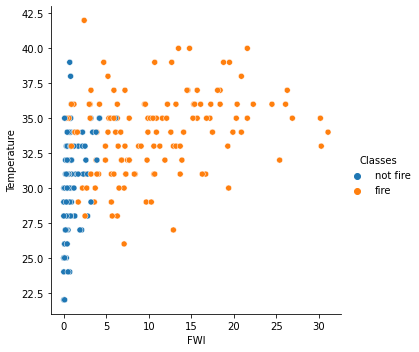

In [103]:
## relationship between temp and fwi based on classes
sns.relplot(data=df, x="FWI", y="Temperature", hue="Classes")
## we see with rise in temp fwi rises thus more casses of fire 

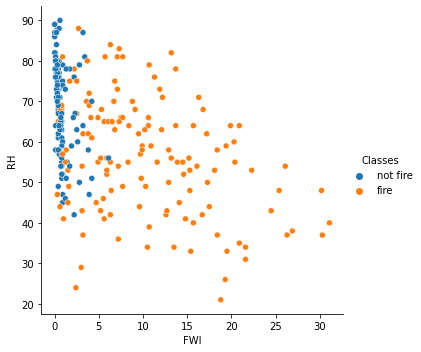

In [104]:
## relationship between rh and fwi based on classes
sns.relplot(data=df, x="FWI", y="RH", hue="Classes")


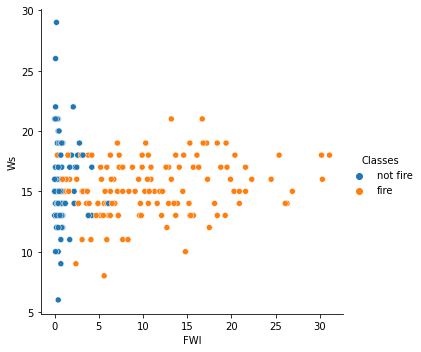

In [105]:
## relationship between ws and fwi based on classes
sns.relplot(data=df, x="FWI", y="Ws", hue="Classes")
## we see between 10 to 20 ws fwi value is more so more casses of fire 

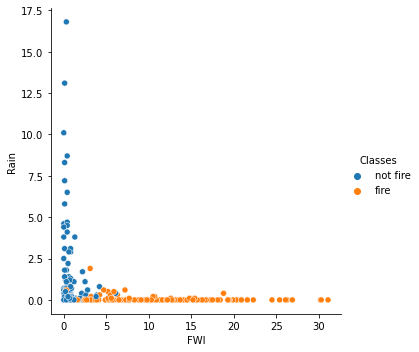

In [106]:
## relationship between ws and fwi based on classes
sns.relplot(data=df, x="FWI", y="Rain", hue="Classes")
## we see less the rain more is the value of fwi and more are the casses of fire 

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='Rain COUNT'>

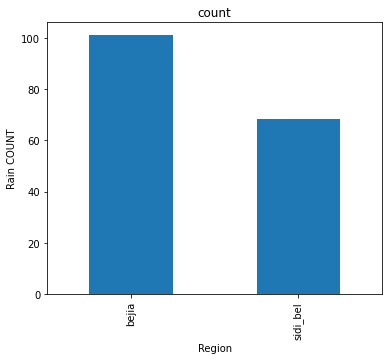

In [108]:
## which region gets the most rainfall 
df2 = df.groupby(["Region"])["Rain"].sum()
df2
df2.plot(kind='bar', title='count', ylabel='Rain COUNT',
         xlabel='Region', figsize=(6, 5))
## we see sidi_bel region experiences less rainfall thus more casses of fire in this region 

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='FWI mean COUNT'>

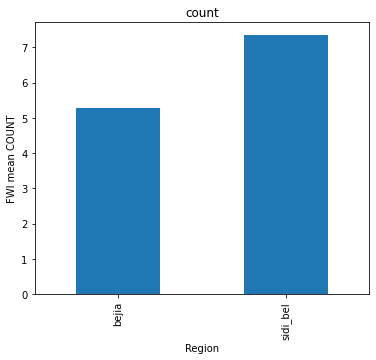

In [109]:
## which region gets the most fwi mean
df3 = df.groupby(["Region"])["FWI"].mean()
df3
df3.plot(kind='bar', title='count', ylabel='FWI mean COUNT',
         xlabel='Region', figsize=(6, 5))
## we see sidi_bel region experiences more fwi mean count thus more casses of fire in this region 

In [113]:
## region vs month vs rain mean vs temp mean vs fwi mean 
df_rg_mnn = df.groupby(["Region","month"])["FWI","Temperature","Rain"].mean()
df_rg_mnn

FWI  Temperature      Rain
Region   month                                  
bejia    6       3.396667    29.800000  0.816667
         7       4.706452    31.838710  0.196774
         8      10.977419    34.387097  0.629032
         9       1.850000    28.566667  1.696667
sidi_bel 6       3.310000    31.800000  0.893333
         7       6.629032    34.258065  0.503226
         8      13.690323    36.290323  0.267742
         9       5.543333    30.166667  0.590000

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='MEAN COUNT'>

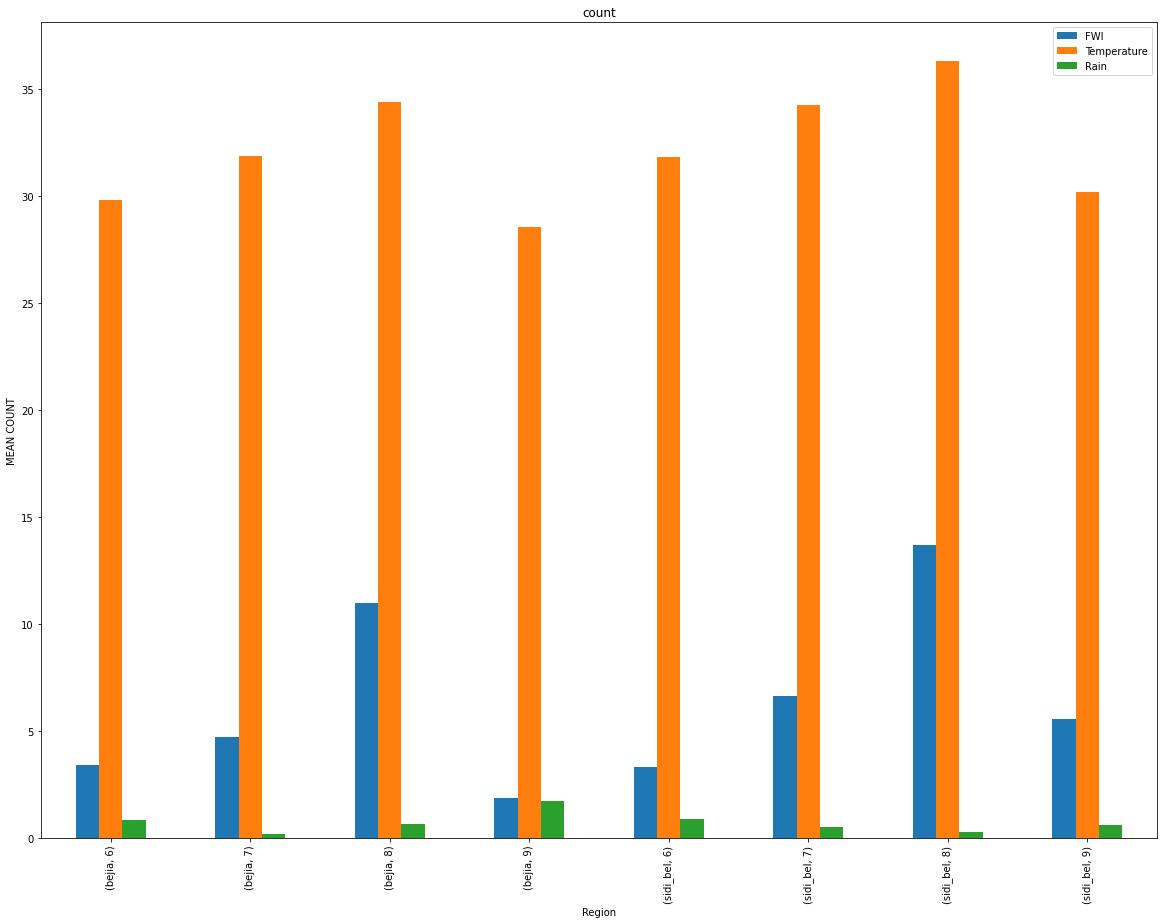

In [115]:
df_rg_mnn.plot(kind='bar', title='count', ylabel='MEAN COUNT',
         xlabel='Region', figsize=(20, 15))

In [128]:
q = df["Temperature"].max()
df[df["Temperature"] == q]
## we see that the temp was max in sisdi bel region on 17th of august which was 42 degree celcius 

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
199,17,8,42,24,9,0.0,9.6,30.3,76.4,15.7,30.4,2.4,fire,sidi_bel


In [129]:
m = df["Temperature"].min()
df[df["Temperature"] == m]
## min temp was 22 degree celcius on 2nd and 14th of sept regioin was bejia 


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
93,2,9,22,86,15,10.1,30.5,0.7,0.7,0.0,1.1,0.0,not fire,bejia
105,14,9,22,76,26,8.3,47.4,1.1,0.7,0.4,1.6,0.1,not fire,bejia


In [133]:
## min rain dataset 
o = df["Rain"].min()
df_rain_min = df[df["Rain"] == o]
df_rain_min


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejia
4,5,6,27,77,16,0.0,64.8,0.3,14.2,1.2,3.9,0.5,not fire,bejia
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,0.7,2.5,fire,bejia
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,bejia
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,21,9,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,fire,sidi_bel
235,22,9,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire,sidi_bel
236,23,9,35,56,14,0.0,8.9,29.4,115.6,7.5,3.6,15.2,fire,sidi_bel
238,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,0.3,not fire,sidi_bel


In [140]:
df_rain = df_rain_min.groupby(["Region"])["Classes"].value_counts(normalize=True)*100
df_rain

Region    Classes 
bejia     fire        83.333333
          not fire    16.666667
sidi_bel  fire        88.059701
          not fire    11.940299
Name: Classes, dtype: float64

<AxesSubplot:title={'center':'count'}, xlabel='Region', ylabel='percentage of occurance '>

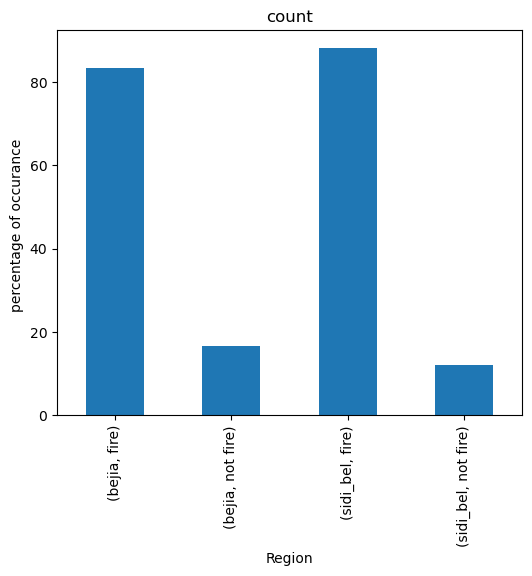

In [142]:
## percentage of occurance of fire and not fire on the day of minimum rain for both of the region 
df_rain.plot(kind='bar', title='count', ylabel='percentage of occurance ',
         xlabel='Region', figsize=(6, 5))

In [143]:
## max rain dataset 
p = df["Rain"].max()
df_rain_max = df[df["Rain"] == p]
df_rain_max

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
91,31,8,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire,bejia


In [145]:
## temp and day correlation of the whole database 
df5 = df[["Temperature","day"]]
df5

,Temperature,day
0,29,1
1,29,2
2,26,3
3,25,4
4,27,5
...,...,...
239,30,26
240,28,27
241,27,28
242,24,29


In [146]:
df5.corr()

,Temperature,day
Temperature,1.000000,0.095772
day,0.095772,1.000000


## for the month of august in both the region the forest fire cases are large thus we can bring on the relationship betweet day,temp,rain,casses for the month of august in both the region 

In [147]:
df_aug = df[df["month"] == 8]
df_aug

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
61,1,8,36,45,14,0.0,78.8,4.8,10.2,0.2,4.7,0.9,not fire,bejia
62,2,8,35,55,12,0.4,7.8,5.8,1.0,1.7,5.5,0.8,not fire,bejia
63,3,8,35,63,14,0.3,76.6,5.7,1.0,1.7,5.5,0.8,not fire,bejia
64,4,8,34,69,13,0.0,8.5,8.2,19.8,0.4,8.2,3.9,fire,bejia
65,5,8,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,fire,bejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,27,8,36,54,14,0.0,9.1,65.9,177.3,1.0,6.8,26.1,fire,sidi_bel
210,28,8,35,56,14,0.4,79.2,3.7,16.6,2.1,30.6,6.1,not fire,sidi_bel
211,29,8,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,sidi_bel
212,30,8,34,49,15,0.0,89.2,24.8,159.1,8.1,35.7,1.6,fire,sidi_bel


<AxesSubplot:xlabel='Temperature', ylabel='day'>

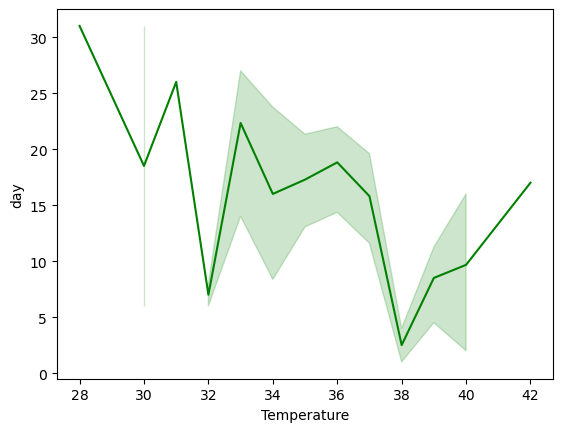

In [148]:
## lineplot 
sns.lineplot(x="Temperature",y="day",data=df_aug,color="g")

<AxesSubplot:xlabel='Rain', ylabel='day'>

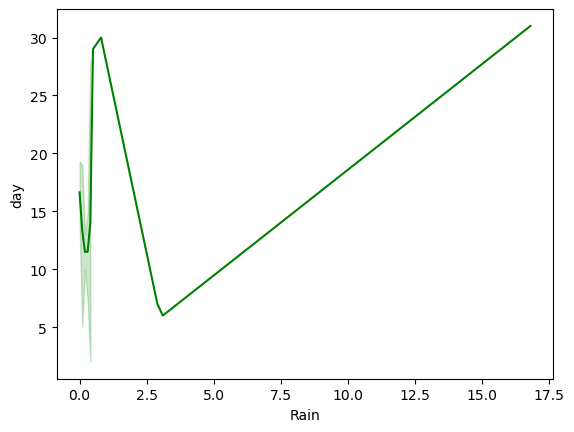

In [149]:
## lineplot 
sns.lineplot(x="Rain",y="day",data=df_aug,color="g")

In [156]:
df6 = df_aug.groupby(["Region","Classes"])["day"].nunique()
df6
## we see there were 24 days of fire in august in bejia and 27 days of fire in sidi_bel in month of august  

Region    Classes 
bejia     fire        24
          not fire     7
sidi_bel  fire        27
          not fire     4
Name: day, dtype: int64

<AxesSubplot:title={'center':'dayscount'}, xlabel='Region', ylabel='count of occurance '>

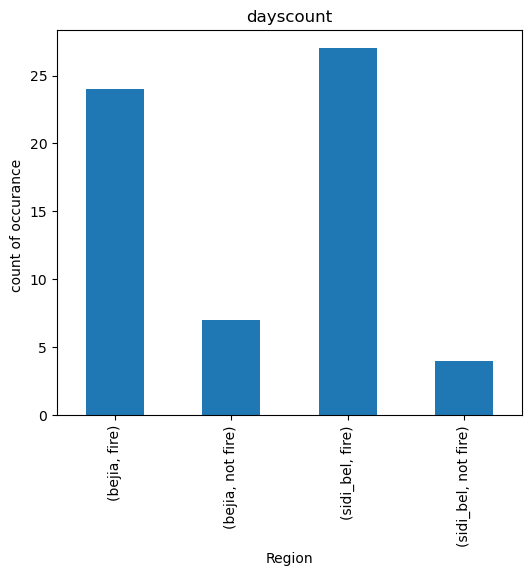

In [157]:
df6.plot(kind='bar', title='dayscount', ylabel='count of occurance ',
         xlabel='Region', figsize=(6, 5))

In [158]:
df7 = df_aug.groupby(["Region","Classes"])["Temperature","RH","Ws","Rain"].mean()
df7

Temperature         RH         Ws     Rain
Region   Classes                                             
bejia    fire        34.583333  62.416667  16.208333  0.02500
         not fire    33.714286  60.571429  15.571429  2.70000
sidi_bel fire        36.592593  44.444444  14.703704  0.07037
         not fire    34.250000  56.250000  13.750000  1.60000

<AxesSubplot:title={'center':'mean count'}, xlabel='Region', ylabel='count of means '>

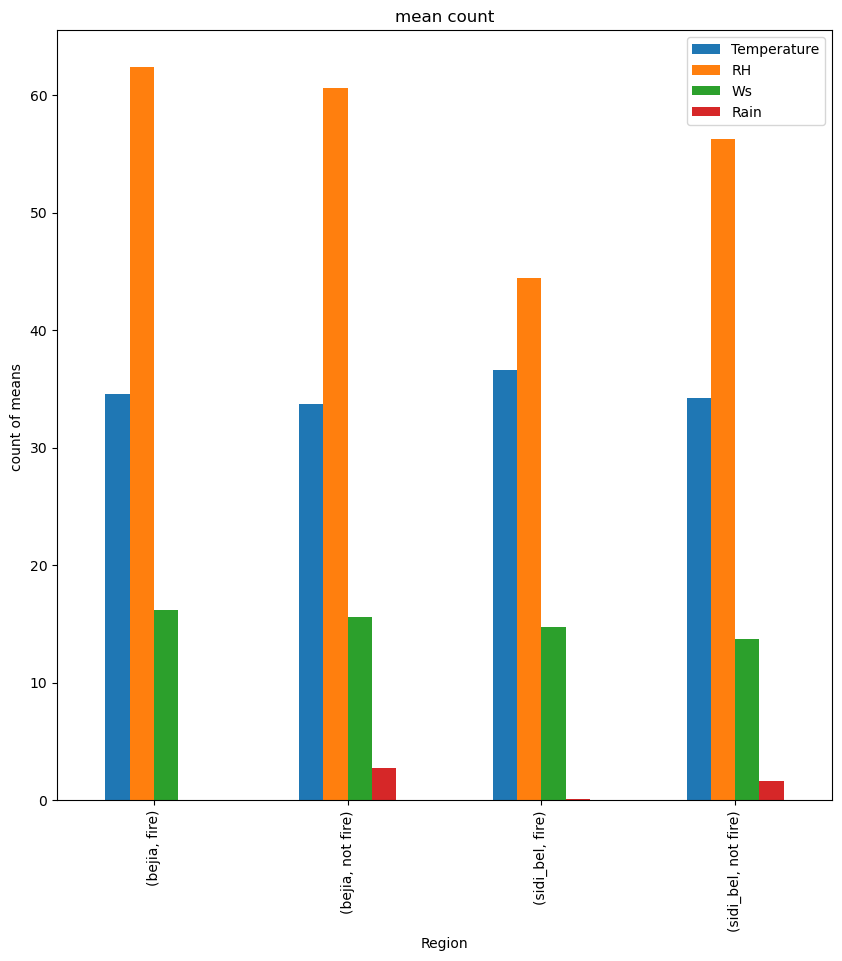

In [160]:
df7.plot(kind='bar', title='mean count', ylabel='count of means ',
         xlabel='Region', figsize=(10, 10))